In [7]:
import numpy as np
import pandas as pd
from plotnine import *

In [8]:
obs=pd.read_csv("Data\ObesityDataSet_raw_and_data_sinthetic.csv")

In [9]:
obs.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
obs['FCVC']=round(obs['FCVC'],0)

In [11]:
obs.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [12]:
obs.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.583905,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [13]:
obs.describe(include=object)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [14]:
obs.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


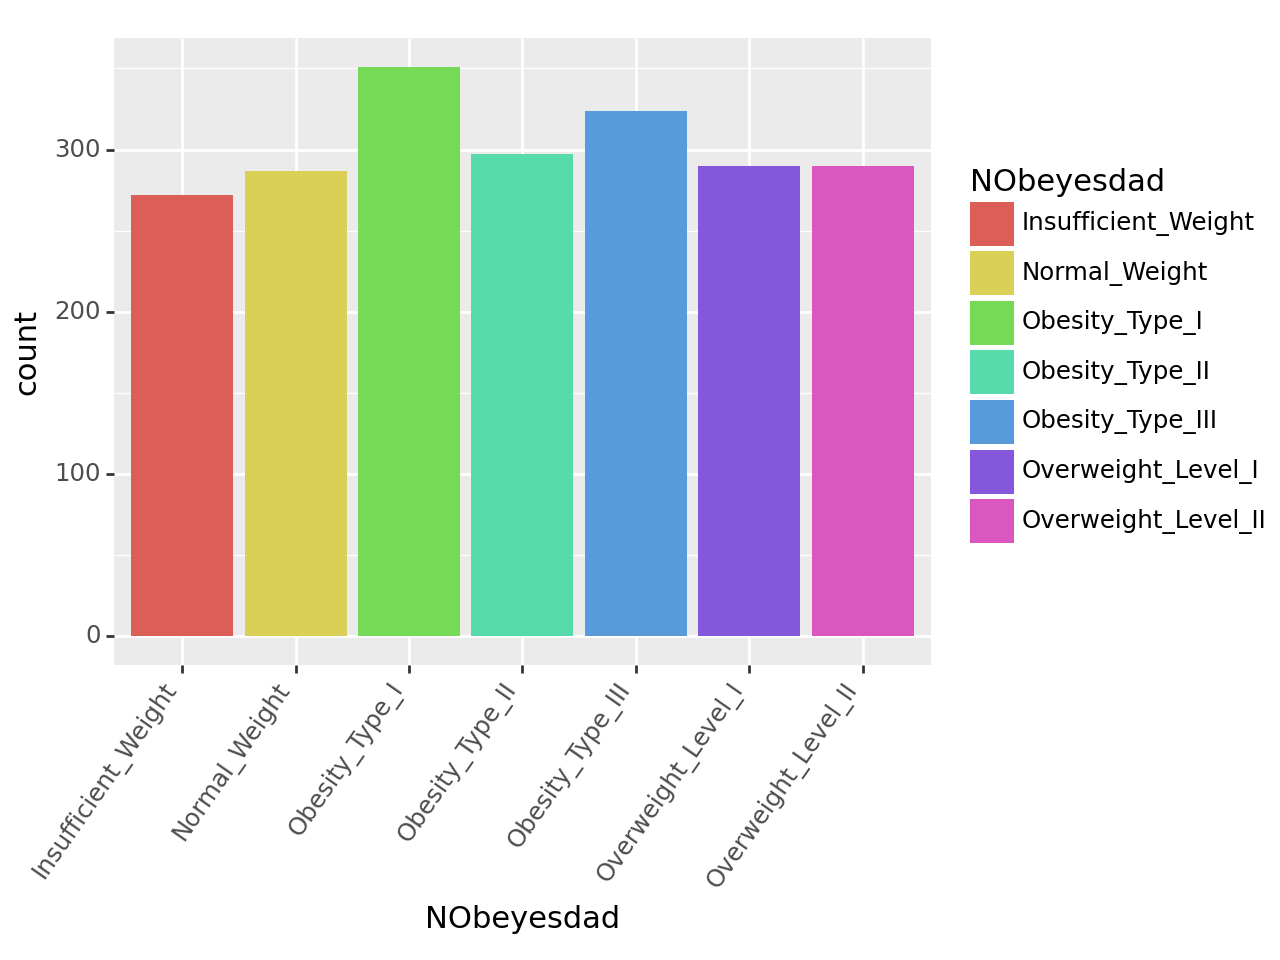

<Figure Size: (640 x 480)>

In [15]:
ggplot(obs) + aes(x="NObeyesdad",fill="NObeyesdad") +geom_bar() +theme(axis_text_x=element_text(rotation=55,hjust=1))


1. ¿Cuanta gente de cada grupo sigue una dieta sana(es decir bebe entre 1y 2 litros de agua, hace ejercicio de 2 a 4 dias por semana, no come mucho entre comidas, sin comida con muchas calorias, no fuma no usa demasiado los juegos, bebe a veces o nunca alcohol, comidas principales 3)?



In [16]:
obs.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [17]:
obs["FAVC"].count()

2111

In [18]:
dieta_sana_condiciones = (
    (obs['CH2O'].between(1, 4)) &
    (obs['FAF'].between(2, 4)) &
    (obs['CAEC']=="Sometimes") &
    (obs['FAVC'] == 'no') &
    (obs['SMOKE'] == 'no') &
    (obs['TUE']<2) &
    ((obs['CALC'] == 'Sometimes') | (obs['CALC'] == 'no')) &
    (obs['NCP'] == 3))

In [19]:
healthy_people=obs[dieta_sana_condiciones].groupby('NObeyesdad').size().reset_index()
healthy_people

,NObeyesdad,0
0,Insufficient_Weight,3
1,Normal_Weight,11
2,Obesity_Type_I,1
3,Obesity_Type_II,1
4,Overweight_Level_I,4
5,Overweight_Level_II,3


In [20]:
healthy_people=obs[dieta_sana_condiciones]
healthy_people.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
12,Male,22.0,1.65,56.0,no,no,3.0,3.0,Sometimes,no,3.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
73,Male,19.0,1.85,65.0,yes,no,2.0,3.0,Sometimes,no,3.0,no,2.0,1.0,Sometimes,Bike,Normal_Weight
75,Female,23.0,1.63,45.0,yes,no,3.0,3.0,Sometimes,no,3.0,yes,2.0,0.0,no,Public_Transportation,Insufficient_Weight
96,Female,23.0,1.66,60.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
153,Male,34.0,1.69,84.0,yes,no,2.0,3.0,Sometimes,no,3.0,no,2.0,0.0,no,Automobile,Overweight_Level_II
192,Male,20.0,1.83,85.0,yes,no,3.0,3.0,Sometimes,no,3.0,yes,3.0,0.0,Sometimes,Automobile,Overweight_Level_I
225,Male,25.0,1.83,121.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,2.0,0.0,Sometimes,Walking,Obesity_Type_II
255,Male,19.0,1.78,81.0,yes,no,1.0,3.0,Sometimes,no,2.0,no,3.0,0.0,no,Bike,Overweight_Level_I
274,Female,25.0,1.61,61.0,no,no,2.0,3.0,Sometimes,no,1.0,no,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight


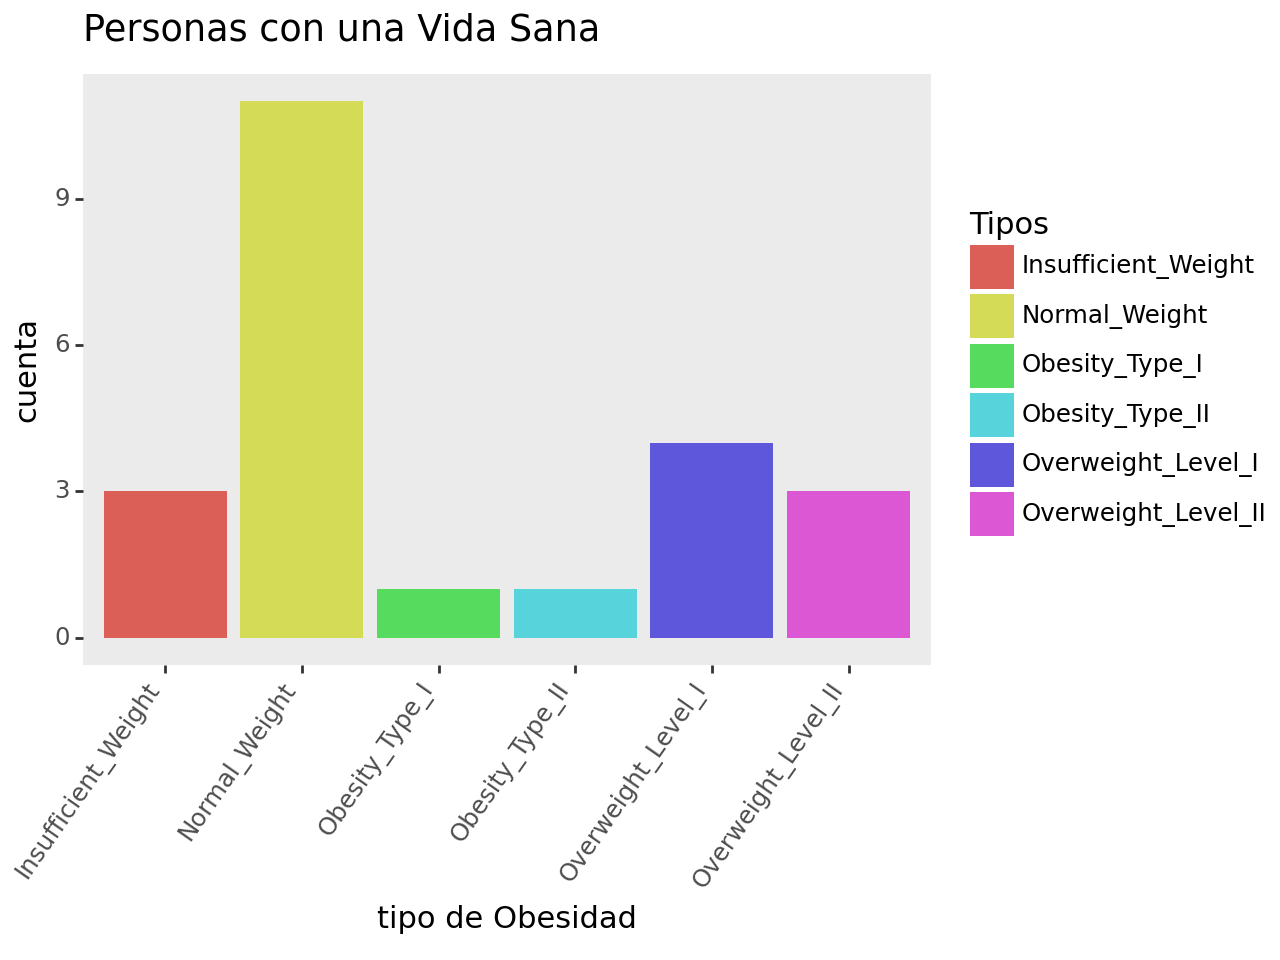

<Figure Size: (640 x 480)>

In [43]:
ggplot(healthy_people) + aes(x="NObeyesdad",fill= "NObeyesdad") + geom_bar() +   labs(
    title='Personas con una Vida Sana',x='tipo de Obesidad',y='cuenta',fill='Tipos')+ theme(
        axis_text_x=element_text(rotation=55,hjust=1))+ theme(panel_grid = element_blank())

#SE QUEDAN CUATRO GATOS. DEBERIAMOS REBAJAR CRITERIO DE VIDA SANA

2. ¿En cada grupo como es el uso de los moviles, hacen mucho deporte? Correlación entre uso de tecnología y actividad física

In [23]:
tech=obs.groupby("NObeyesdad")["TUE"].mean().reset_index()
techi=pd.DataFrame(tech)
techi
#TUE-tech devices

,NObeyesdad,TUE
0,Insufficient_Weight,0.839459
1,Normal_Weight,0.675958
2,Obesity_Type_I,0.676743
3,Obesity_Type_II,0.515186
4,Obesity_Type_III,0.604623
5,Overweight_Level_I,0.612992
6,Overweight_Level_II,0.697275


In [24]:
tech=obs[["NObeyesdad","TUE","Gender"]]
techi=pd.DataFrame(tech)
techi

,NObeyesdad,TUE,Gender
0,Normal_Weight,1.000000,Female
1,Normal_Weight,0.000000,Female
2,Normal_Weight,1.000000,Male
3,Overweight_Level_I,0.000000,Male
4,Overweight_Level_II,0.000000,Male
...,...,...,...
2106,Obesity_Type_III,0.906247,Female
2107,Obesity_Type_III,0.599270,Female
2108,Obesity_Type_III,0.646288,Female
2109,Obesity_Type_III,0.586035,Female


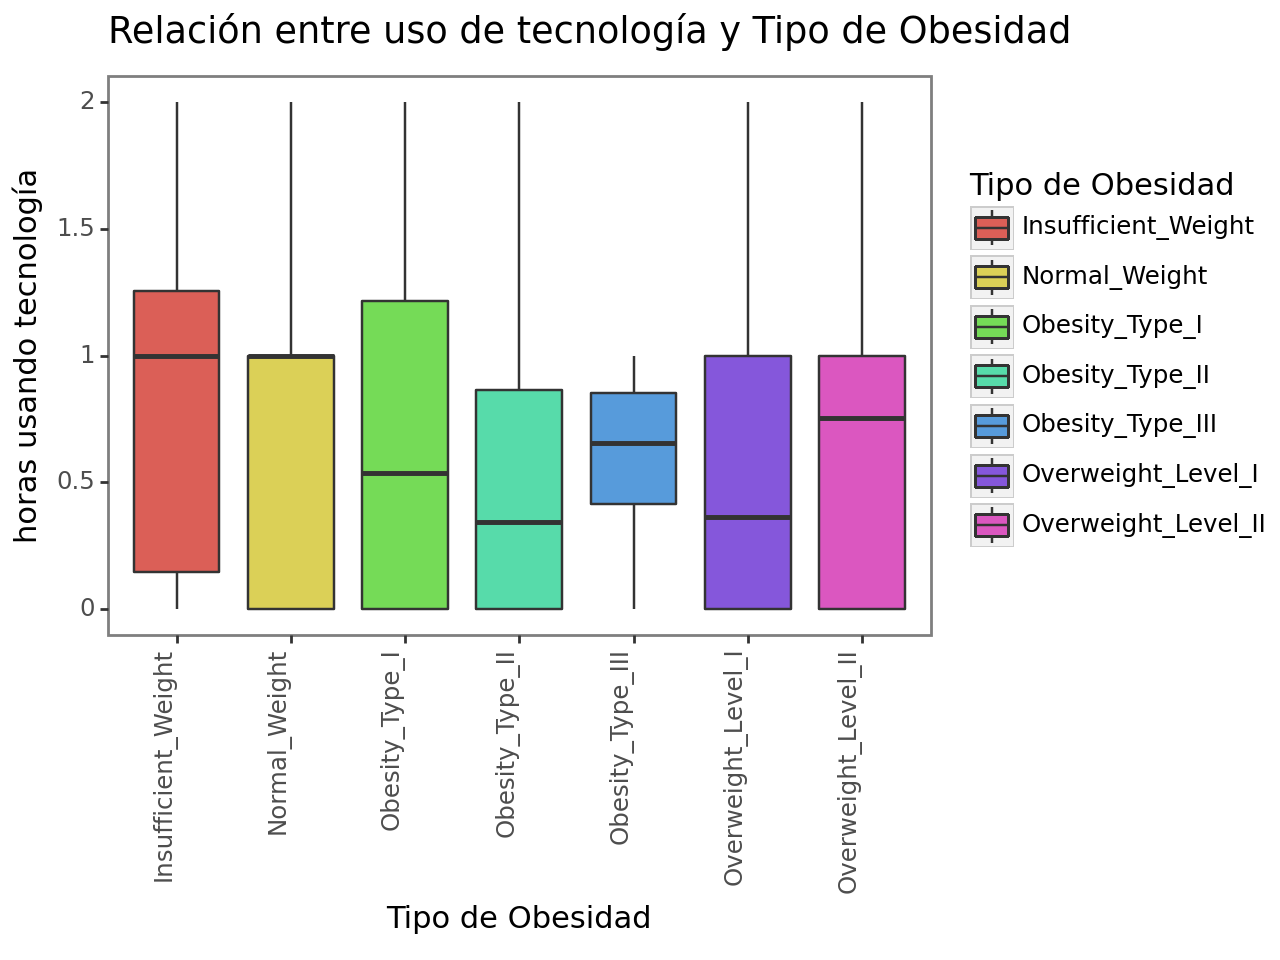

<Figure Size: (640 x 480)>

In [25]:
ggplot(techi, aes(x = 'NObeyesdad', y = 'TUE', fill = 'NObeyesdad')) + geom_boxplot() + theme_bw() + labs(
    x = "Tipo de Obesidad",
    y = "horas usando tecnología",
    title = "Relación entre uso de tecnología y Tipo de Obesidad",
    fill = "Tipo de Obesidad") + theme(axis_text_x = element_text(angle = 90, hjust = 1)) + theme(panel_grid = element_blank())

In [26]:
exer=obs[["NObeyesdad","FAF","Gender"]]
exercise=pd.DataFrame(exer)
exercise

,NObeyesdad,FAF,Gender
0,Normal_Weight,0.000000,Female
1,Normal_Weight,3.000000,Female
2,Normal_Weight,2.000000,Male
3,Overweight_Level_I,2.000000,Male
4,Overweight_Level_II,0.000000,Male
...,...,...,...
2106,Obesity_Type_III,1.676269,Female
2107,Obesity_Type_III,1.341390,Female
2108,Obesity_Type_III,1.414209,Female
2109,Obesity_Type_III,1.139107,Female


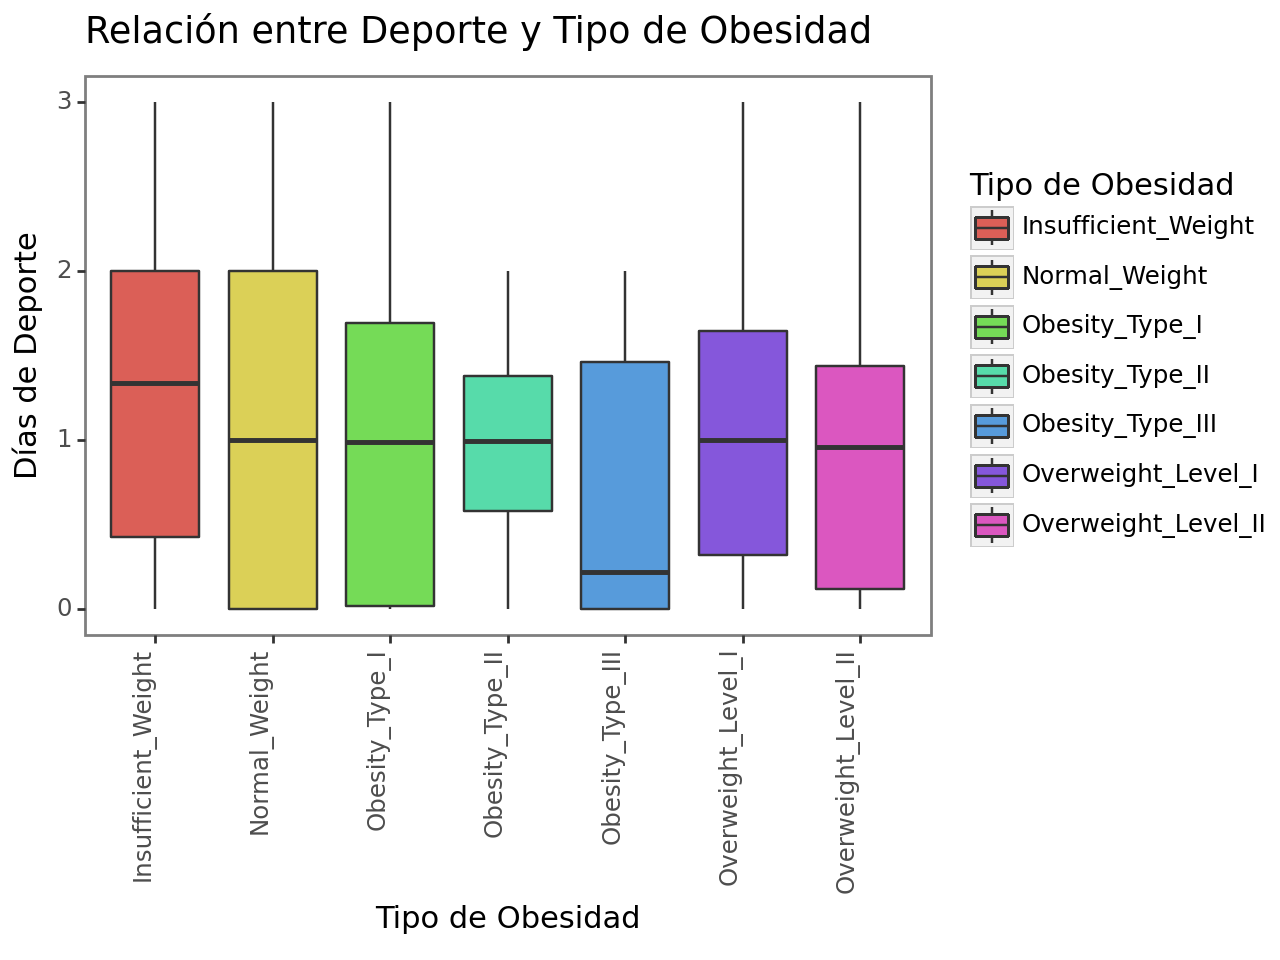

<Figure Size: (640 x 480)>

In [27]:
ggplot(exercise, aes(x = 'NObeyesdad', y = 'FAF', fill = 'NObeyesdad')) + geom_boxplot() + theme_bw() + labs(
    x = "Tipo de Obesidad",
    y = "Días de Deporte",
    title = "Relación entre Deporte y Tipo de Obesidad",
    fill = "Tipo de Obesidad") + theme(axis_text_x = element_text(angle = 90, hjust = 1)) + theme(panel_grid = element_blank())

In [28]:
obs.loc[(obs["FAF"]>2.5), ["NObeyesdad","FAF"]]

,NObeyesdad,FAF
1,Normal_Weight,3.000000
7,Normal_Weight,3.000000
20,Overweight_Level_II,3.000000
25,Normal_Weight,3.000000
28,Normal_Weight,3.000000
...,...,...
1425,Obesity_Type_I,2.891180
1426,Obesity_Type_I,3.000000
1427,Obesity_Type_I,2.819661
1447,Obesity_Type_I,2.641020


In [29]:
obs["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [30]:
obs.loc[(obs["FAF"]==2) & (obs["NObeyesdad"]=="Obesity_Type_III") & (obs["Gender"]=="Male"), ["NObeyesdad","FAF","Gender"]]

,NObeyesdad,FAF,Gender
344,Obesity_Type_III,2.0,Male


3. La retención de grasa tiene un factor genético importante y además el hecho de coger también los malos hábitos alimentarios que puede haber en tu casa, así que podríamos ver la proporción de gente obesa que tienen familiares obesos frente a la que no para saber hasta que punto puede ser un factor influyente

In [31]:
obs["family_history_with_overweight"].unique()

array(['yes', 'no'], dtype=object)

In [32]:
obs.groupby(["NObeyesdad", "family_history_with_overweight"]).size().reset_index(name='count')

,NObeyesdad,family_history_with_overweight,count
0,Insufficient_Weight,no,146
1,Insufficient_Weight,yes,126
2,Normal_Weight,no,132
3,Normal_Weight,yes,155
4,Obesity_Type_I,no,7
5,Obesity_Type_I,yes,344
6,Obesity_Type_II,no,1
7,Obesity_Type_II,yes,296
8,Obesity_Type_III,yes,324
9,Overweight_Level_I,no,81


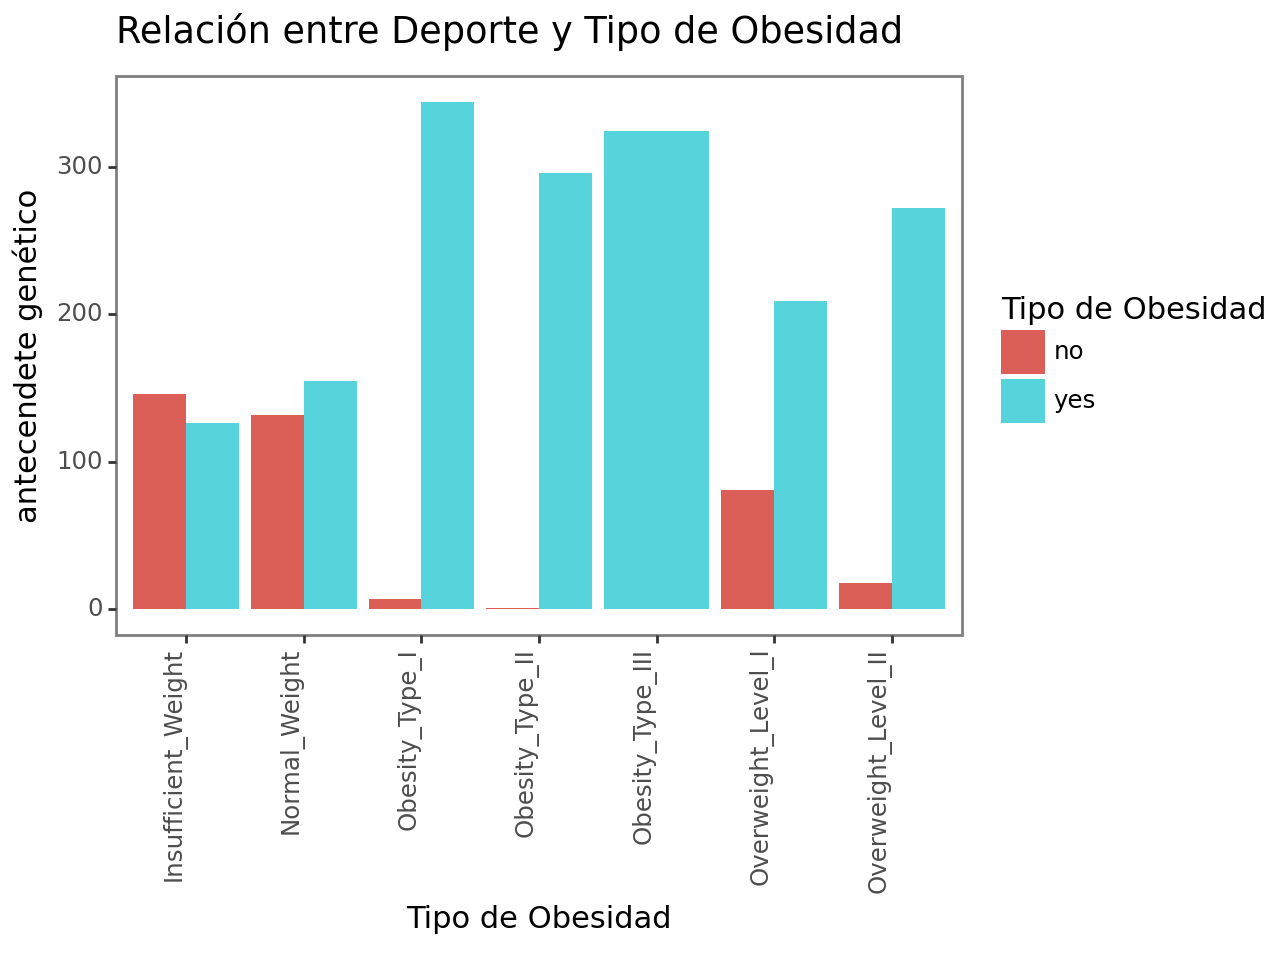

<Figure Size: (640 x 480)>

In [33]:
ggplot(obs)+ aes(x="NObeyesdad",fill="family_history_with_overweight")+geom_bar(position="dodge")+ theme_bw() + labs(
    x = "Tipo de Obesidad",
    y = "antecendete genético",
    title = "Relación entre Deporte y Tipo de Obesidad",
    fill = "Tipo de Obesidad") + theme(axis_text_x = element_text(angle = 90, hjust = 1)) + theme(panel_grid = element_blank())

obesity III tiene un registro de "no obesidad en la familia" en la gráfica no se ve representado

Hay un fuerte componente genético:

- De esas personas que tienen antecendetes familiares, siguen una dieta sana?

In [34]:
obs[obs["family_history_with_overweight"] == "yes"].groupby("NObeyesdad").size().reset_index(name='count')

,NObeyesdad,count
0,Insufficient_Weight,126
1,Normal_Weight,155
2,Obesity_Type_I,344
3,Obesity_Type_II,296
4,Obesity_Type_III,324
5,Overweight_Level_I,209
6,Overweight_Level_II,272


In [35]:
obs_sanos=obs[obs["family_history_with_overweight"] == "yes"][dieta_sana_condiciones].groupby("NObeyesdad").size().reset_index(name='count')

C:\Users\EVO\AppData\Local\Temp\ipykernel_27072\2273500962.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


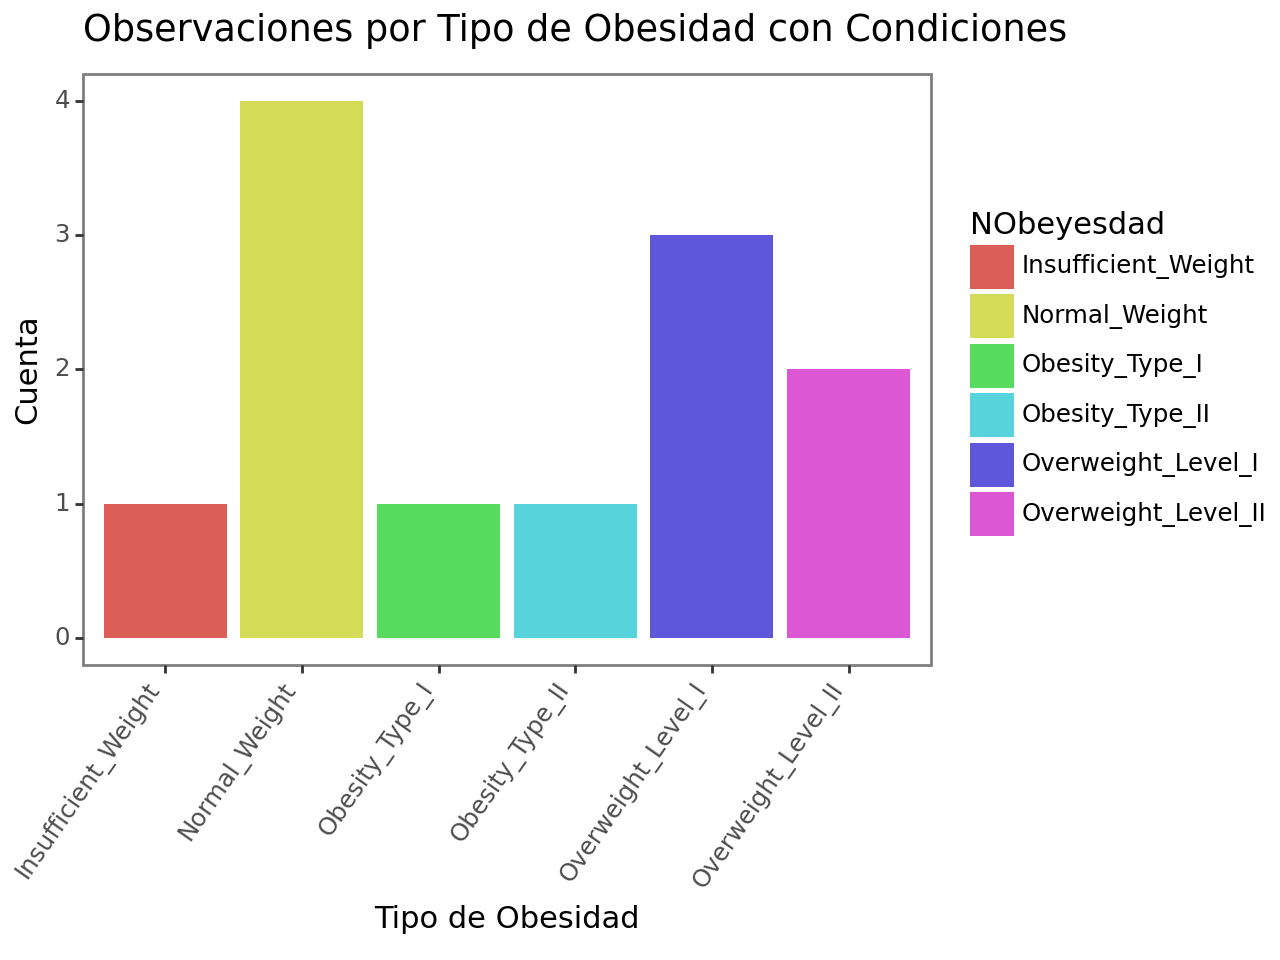

<Figure Size: (640 x 480)>

In [36]:
(ggplot(obs_sanos, aes(x='NObeyesdad', y='count', fill='NObeyesdad')) + geom_bar(stat='identity') +
        labs(x='Tipo de Obesidad', y='Cuenta', title='Observaciones por Tipo de Obesidad con Condiciones') +
        theme_bw() +
        theme(axis_text_x=element_text(rotation=55,hjust=1))) + theme(panel_grid = element_blank()) 

No mucha gente con historial de obsesidad en la familia sigue una dieta sana. Esto puede indicar que no se trata tanto de un componente genético si no de una transmisión de estilo de vida poco sano de padres a hijos.

4. Relación entre las personas con sobrepeso y la práctica de contar calorías. En la cultura de la dieta se suele creer que contar calorías ayuda a no ganar peso y ser más consciente de lo que comes. Demostrar si es una práctica efectiva o no.

In [37]:
obs['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
obs[obs["SCC"] == "yes"].groupby("NObeyesdad").size().reset_index(name='count')

,NObeyesdad,count
0,Insufficient_Weight,22
1,Normal_Weight,30
2,Obesity_Type_I,2
3,Obesity_Type_II,1
4,Overweight_Level_I,37
5,Overweight_Level_II,4


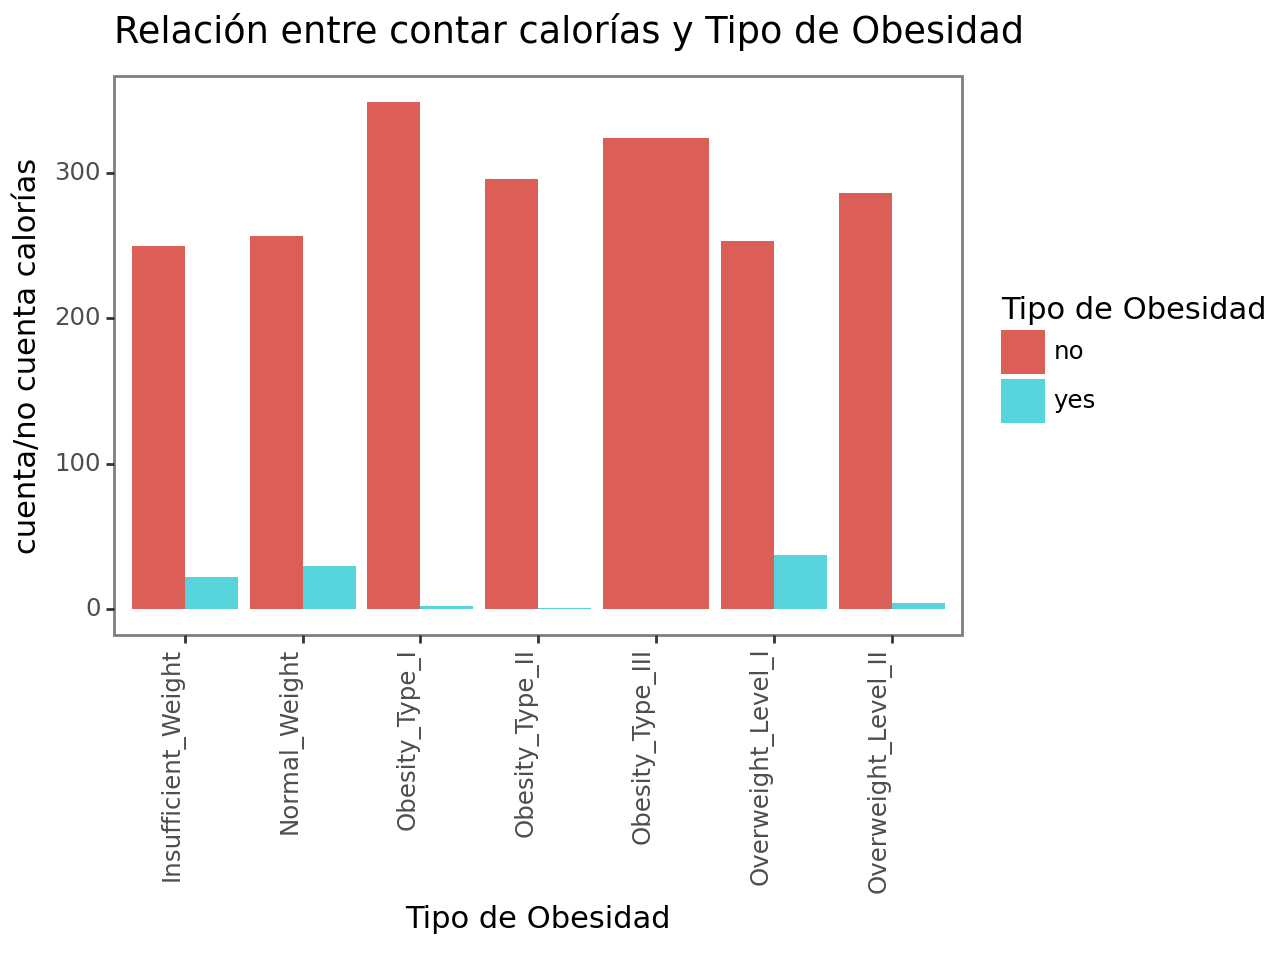

<Figure Size: (640 x 480)>

In [39]:
ggplot(obs) + aes(x='NObeyesdad',fill='SCC') + geom_bar(position="dodge")+ theme_bw() + labs(
    x = "Tipo de Obesidad",
    y = "cuenta/no cuenta calorías",
    title = "Relación entre contar calorías y Tipo de Obesidad",
    fill = "Tipo de Obesidad") + theme(axis_text_x = element_text(angle = 90, hjust = 1)) + theme(panel_grid = element_blank())

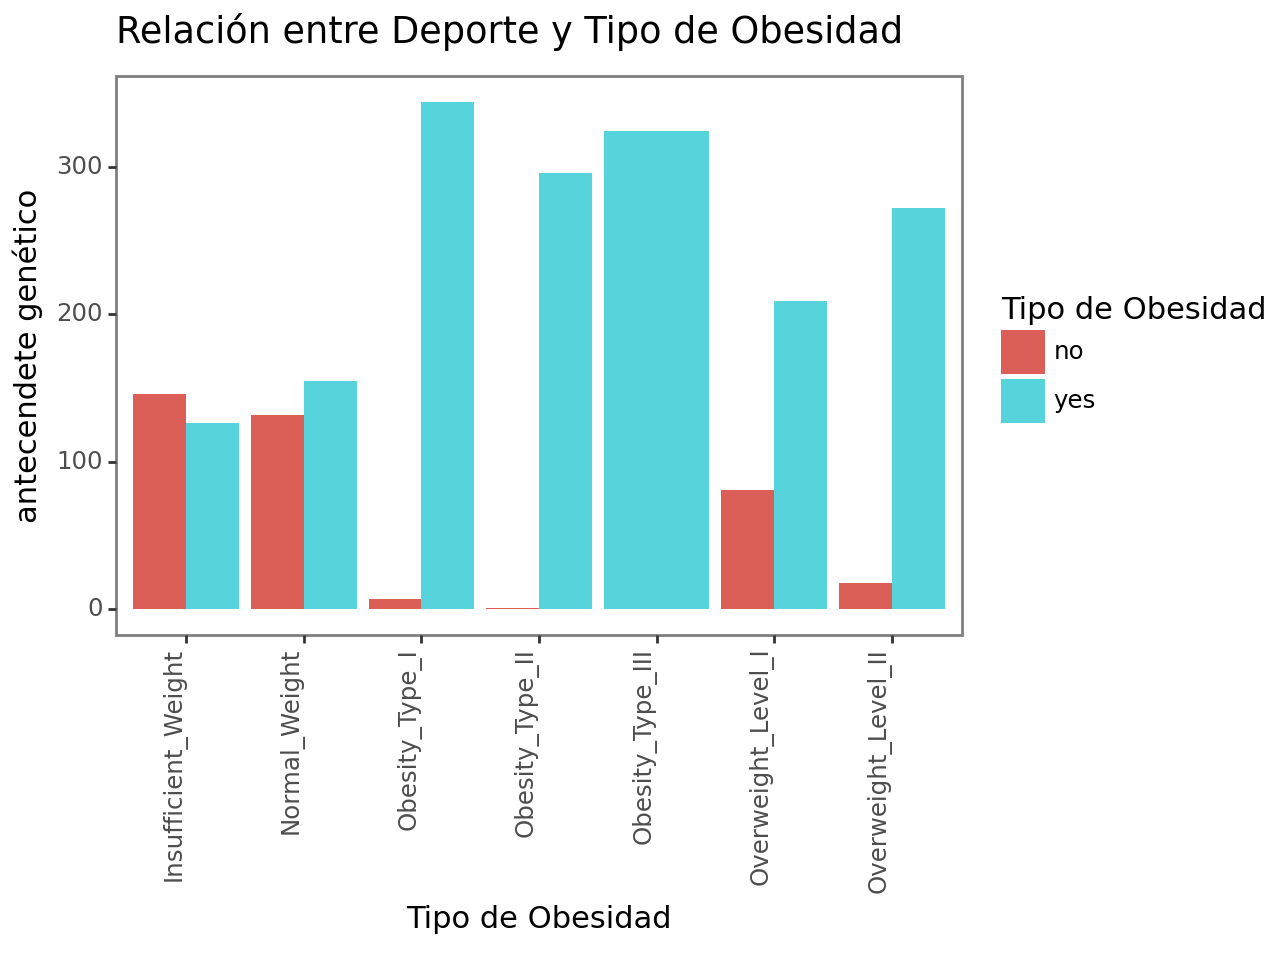

<Figure Size: (640 x 480)>

In [40]:
ggplot(obs)+ aes(x="NObeyesdad",fill="family_history_with_overweight")+geom_bar(position="dodge")+ theme_bw() + labs(
    x = "Tipo de Obesidad",
    y = "antecendete genético",
    title = "Relación entre Deporte y Tipo de Obesidad",
    fill = "Tipo de Obesidad") + theme(axis_text_x = element_text(angle = 90, hjust = 1)) + theme(panel_grid = element_blank())